In [1]:
import matplotlib.pyplot as plt
import numpy as np
from qutip import *
from sympy.physics.quantum.cg import CG
from sympy.physics.wigner import wigner_6j, wigner_3j

In [2]:
from sympy import symbols, Eq, solve, summation
from sympy.functions import exp

In [3]:
from scipy.optimize import minimize_scalar
import math

In [4]:
from scipy.optimize import curve_fit
import matplotlib.cm as cm
import matplotlib.colors as mcolors

In [5]:
def func(x,Nmax,nbar):
    
    Z = (1-np.exp(-(Nmax+1)*x))/(1-np.exp(-x))
    n = np.exp(-Nmax*x)*(np.exp((Nmax + 1)*x) -(Nmax+1)*np.exp(x) + Nmax)/(np.exp(x) -1)**2
    
    
    return np.abs(nbar - n/Z)

In [6]:
Nmax=14
nbar=3
res = minimize_scalar(func,args=(Nmax,nbar),bounds=(0, 1), method='bounded')

In [7]:
x = res.x

In [8]:
hbar = 1.054571817e-34
kB = 1.380649e-23
omega = 2*np.pi*1.4*10e6
#x = 0.184132
Z = (1-np.exp(-(Nmax+1)*x))/(1-np.exp(-x))

T = hbar*omega/(kB*x)
T

0.002527075613606284

In [9]:
P = []
for i in range(Nmax+1): #Nmotion=15 but for <n> =3 keep up to i=10
    P.append(np.exp(-i*x)/Z)

In [10]:
sum(P)

1.0

In [11]:
Pn = []
for i in range(Nmax+1):
    Pn.append(np.exp(-i*x)/Z*i)

In [12]:
sum(Pn) #<n>

2.9999994106949863

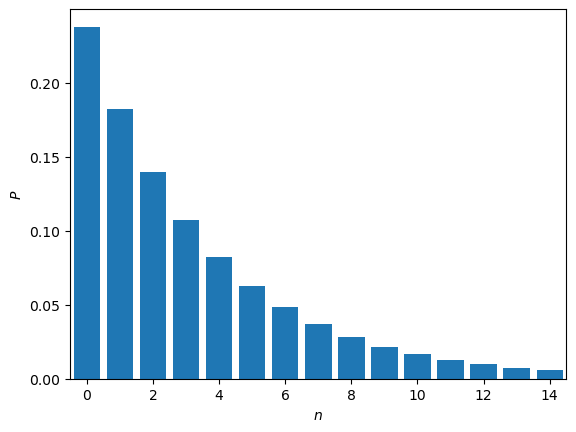

In [13]:
plt.figure()
plt.bar(np.arange(0,Nmax+1),P)
plt.ylabel('$P$')
plt.xlabel('$n$')
plt.xlim(-0.5,Nmax+0.5)
plt.show()

In [14]:
P[-1]

0.005751477788089598

## B = 5G, Δ$_{1,0}$ = 10 ΜHz, Δ$_{1,1}$ = 20.5 ΜHz, Δ$_{1,2}$ = 20 ΜΗz, ω = 1.4 ΜΗz,
## Ω$_{1,0}$ = Ω$_{1,2}$ = 23.5 ΜHz, Ω$_{1,1}$ = 10 ΜΗz, state 7

In [ ]:
t = []
n = []
n_div = []
for i in range(Nmax+1):
    t.append(np.loadtxt(""+str(path_name)+"data_B5.0_D10_10_D12_20_O10_O11_23.5_O11_10_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:, 0])
    n.append(np.loadtxt(""+str(path_name)+"data_B5.0_D10_10_D12_20_O10_O11_23.5_O11_10_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:, 1])
    n_div.append(np.loadtxt(""+str(path_name)+"data_paper/data_B5.0_D10_10_D12_20_O10_O11_23.5_O11_10_"+str(i)+"_Gamma_2.44745_ntraj_500_stds_improved_step.txt")[:, 0])          

In [16]:
nMC = np.zeros(len(t[0]))
for i in range(Nmax+1):
    nMC +=np.array(n[i])*P[i]

In [17]:
nMC_dev = np.zeros(len(t[0]))
for i in range(Nmax+1):
    nMC_dev += np.array(n_div[i])*P[i]
nMC_dev = nMC_dev/np.sqrt(500-1)

In [ ]:
pops = []
pops_divs = []
for j in range(12):
    pop = []
    pop_div = []
    for i in range(Nmax+1):
        pop.append(P[i]*np.loadtxt(""+str(path_name)+"data_B5.0_D10_10_D12_20_O10_O11_23.5_O11_10_"+str(i)+"_Gamma_2.44745_ntraj_500_improved_step.txt")[:,j+2])
        pop_div.append(P[i]*np.loadtxt(""+str(path_name)+"ata_B5.0_D10_10_D12_20_O10_O11_23.5_O11_10_"+str(i)+"_Gamma_2.44745_ntraj_500_stds_improved_step.txt")[:,j+1])
    pop_=np.sum(pop,axis=0)
    pop_div_=np.sum(pop_div,axis=0)
    
    pops.append(pop_)
    pops_divs.append(pop_div_)

pops_divs = pops_divs/np.sqrt(500-1)

In [19]:
plt.rcParams.update({'font.size': 8})

In [20]:
colors = cm.Paired(np.linspace(0,1,12))

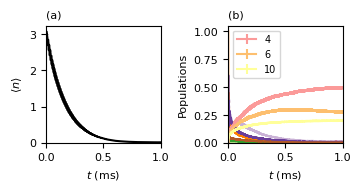

In [22]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True,figsize=(3.5,1.8))

gs = GridSpec(1, 2, figure=fig)
#gs.update(wspace=0.005, hspace=0.05)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))


ax1.set_title(r'(a)',loc='left',fontdict={'fontsize': 8})
ax1.errorbar(t[0]*1e-3,nMC,yerr = nMC_dev,color='black',ecolor='black')
ax1.set_ylim(0)
ax1.set_xlim(0,1)
ax1.set_ylabel('$\\langle n \\rangle$')
ax1.set_xlabel('$t$ (ms)')



ax3 = fig.add_subplot(gs[0, 1])
ax3.set_title(r'(b)',loc='left',fontdict={'fontsize': 8})
for i in range(12):
    ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],color=colors[i])
i=4
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=6
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=10
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
ax3.set_ylabel('Populations')
ax3.set_xlabel('$t$ (ms)')
ax3.set_ylim(0)
ax3.set_xlim(0,1)
ax3.legend(loc='upper left',prop={'size': 7})


#plt.savefig("I1_populations.pdf",bbox_inches = "tight")


plt.show()

In [23]:
pop_cool = []
for i in range(12):
    pop_cool.append(np.average(pops[i][:2500]))

In [24]:
pop_cool

[0.002983774128898129,
 0.0018428780072905723,
 0.001609984028225494,
 0.008705012896029585,
 0.32105183613329435,
 0.0519088240468077,
 0.23135013538489693,
 0.047149134383492206,
 0.09826226229560282,
 0.06341279001139988,
 0.15409133077419063,
 0.017632037926755058]

In [25]:
steady_pops =[2.5219545337697136e-05, 3.5433437140971124e-05, 1.0213891803224638e-05, 4.4020500073060234e-05, 0.7353137395982505, 0.0007520912399441204, 0.03519372248798341, 0.0006316809651755381, 0.0024810290754624363, 0.0009114473078347735, 0.22435672364281736, 0.0002446783081765801]

In [26]:
steady_pops[4]

0.7353137395982505

In [27]:
steady_pops[6]

0.03519372248798341

In [28]:
steady_pops[10]

0.22435672364281736

## No motion

In [29]:
I = 1
S = 1
Je = 0
Jg = 1
Lg = 2
F = [i for i in range(int(I-Jg),int(I + Jg + 1),1)]
F.insert(0,int(I+Je))

N = [2*F[i] + 1 for i in range(len(F))]
N = sum(N)

#Zeeman stuff

muB = 9.3e-24 #Bohr magneton J T^-1
hbar = 1.054e-34 # J s

muB = muB/hbar #hbar = 1
muB = muB/(2*np.pi)
muB = muB/1e6  # so it's in 1/2π (MHz T^-1)
#muB=1

# 1Gauss is 0.0001 T
B=5e-04
#print(muB*B) 
#gF = [1,0,1,2]
gF = []
FF = [7,6,7,8]
II = 7


#Lande g factor for F
me = 9.1093837015e-31 
mp = 1.67262192369e-27 

mI = 3.169 #nuclear magnetic moment of 176Lu in units of μN
gI = mI/II
gJg = 1 + (Jg*(Jg +1) + S*(S + 1) - Lg*(Lg + 1))/(2*Jg*(Jg + 1))


gF.append(-gI*me/mp)

for i in range(3):
    gF.append(gJg*(FF[i +1]*(FF[i+1] + 1) + Jg*(Jg+1) - II*(II+1))/(2*FF[i+1]*(FF[i +1] + 1)))

def base(F,i,mF):
    #numbering states from 0 to N-1 starting from -mF to mF
    # 0 is |F',-mF'>
    if i==0:
        b = basis(N,mF+F[i])
    elif i==1:
        b = basis(N,mF + F[i] + 2*F[0] + 1)
    elif i==2:
        b = basis(N,mF + F[i] + 2*F[0] + 1 + 2*F[1] + 1)
    else:
        b = basis(N,mF + F[i] + 2*F[0] + 1 + 2*F[1] + 1 + 2*F[2] +1)
    return b    

def H_I(F,Omega_p):
    HI=0*basis(N,0)*basis(N,0).dag()
    for mFe in range(-F[0],F[0] + 1):
        for ig in range(1,len(F)):
            for mFg in range(-F[ig],F[ig]+1):
                for q in range(-1,2):
                    HI += 2*np.pi*cg(F,ig,mFg,0,mFe,q)*Omega_p[ig-1,q+1]/2*base(F,0,mFe)*base(F,ig,mFg).dag()
                
    return -1/np.sqrt(2*F[0]+1)*(HI + HI.dag()) 

def H_0(F,Delta):
    H0 = 0*basis(N,0)*basis(N,0).dag()
    for l in range(len(F)):
        for mF in range(-F[l],F[l]+1):
            H0 += 2*np.pi*(Delta[l] + gF[l]*muB*mF*B)*base(F,l,mF)*base(F,l,mF).dag() 
    return H0

def cg(F,ig,mFg,ie,mFe,q):
    return float(CG(F[ig],mFg,1,q,F[ie],mFe).doit())
    #return 1

def GammaFgFe(F,ig,Je,Jg,I,GammaJgJe):
    return float((2*Je + 1)*(2*F[ig] + 1)*wigner_6j(Je,F[0],I,F[ig],Jg,1)**2)*GammaJgJe
    #return GammaJgJe

#single collapse operator for each transtion
GammaJgJe = 2.44745 #1/2π (MHz) 3D1 to 3P0
c_ops = []
qs = [-1,0,1]

for ig in range(1,len(F)):
    for mfg in range(-F[ig],F[ig] + 1):
        for mfe in range(-F[0], F[0] + 1):
            for q in qs:
                if cg(F,ig,mfg,0,mfe,q) != 0:
                    cops =np.sqrt(1/(2*F[0] + 1))*cg(F,ig,mfg,0,mfe,q)*np.sqrt(GammaFgFe(F,ig,Je,Jg,I,2*np.pi*GammaJgJe))*base(F,ig,mfg)*base(F,0,mfe).dag()
                    c_ops.append(cops.to("CSR"))
                else:
                    continue

In [30]:
#Rabi frequencies Ω_F,F' #1/2π (MHz)
omega = [23.5,10,23.5]

#turn on/off polarization
Omega_p= np.zeros((3,3)) # (ig-1, q + 1) transition from F state to F' with polarization q

Omega_p[0,0] = Omega_p[0,2] = omega[0]       #σ+ and σ- for F=F[1] to F'= F[0]
Omega_p[1,0] = Omega_p[1,2] = omega[1]      #σ+ and σ- for F=F[2] to F'=F[0]
Omega_p[2,0] = Omega_p[2,2] = omega[2]     #σ+ and σ- for F=F[3] to F'=F[0]

Delta = [0,10,20.5,20]

In [31]:
HI=H_I(F,Omega_p) 
H0 = H_0(F,Delta)

#total Hamiltonian
H = H0 + HI
#make sure Hamiltonian is sparse
H = H.to("CSR").tidyup(atol=1e-8)

In [32]:
rho0 = basis(N,2*F[0] + 1 + 2*F[1] + 1 + 2*F[2]+1)*basis(N,2*F[0] + 1 + 2*F[1] + 1 + 2*F[2]+1).dag()

tlist = np.linspace(0,1000,10000)

e_ops = []
for ig in range(0,len(F)):
    for mf in range(-F[ig],F[ig] + 1):
        e_ops.append(base(F,ig,mf)*base(F,ig,mf).dag())

In [33]:
rho = mesolve(H,rho0,tlist,c_ops,e_ops,options={'progress_bar': 'text'})

10.0%. Run time:   0.18s. Est. time left: 00:00:00:01


c:\Users\kfouka\AppData\Local\anaconda3\Lib\site-packages\qutip\solver\solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(


20.0%. Run time:   0.32s. Est. time left: 00:00:00:01
30.0%. Run time:   0.46s. Est. time left: 00:00:00:01
40.0%. Run time:   0.60s. Est. time left: 00:00:00:00
50.0%. Run time:   0.74s. Est. time left: 00:00:00:00
60.0%. Run time:   0.88s. Est. time left: 00:00:00:00
70.0%. Run time:   1.02s. Est. time left: 00:00:00:00
80.0%. Run time:   1.15s. Est. time left: 00:00:00:00
90.0%. Run time:   1.34s. Est. time left: 00:00:00:00
100.0%. Run time:   1.49s. Est. time left: 00:00:00:00
Total run time:   1.49s


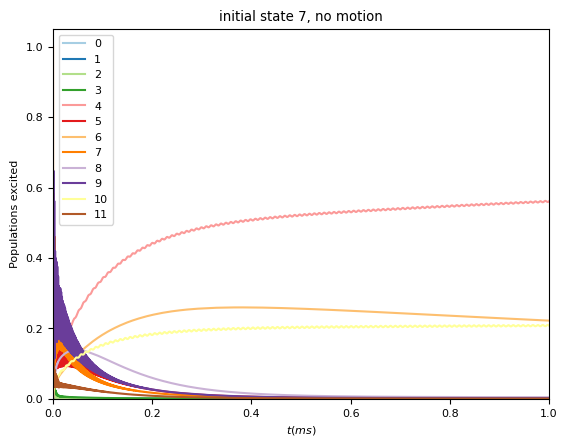

In [34]:
plt.figure()
plt.title('initial state 7, no motion')
for i in range(N):
    plt.plot(tlist*1e-3,rho.expect[i],label=i,color=colors[i])
plt.ylabel('Populations excited')
plt.xlabel('$t (ms)$')
plt.xlim(0,1)
plt.legend()
plt.ylim(0)
#plt.savefig("I1_state_7_populations_e_no_motion.png",bbox_inches = "tight")
plt.show()

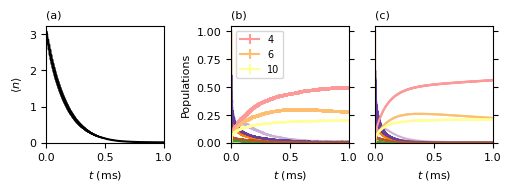

In [35]:
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True,figsize=(5,1.8))

gs = GridSpec(1, 3, figure=fig)
#gs.update(wspace=0.005, hspace=0.05)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))


ax1.set_title(r'(a)',loc='left',fontdict={'fontsize': 8})
ax1.errorbar(t[0]*1e-3,nMC,yerr = nMC_dev,color='black',ecolor='black')
ax1.set_ylim(0)
ax1.set_xlim(0,1)
ax1.set_ylabel('$\\langle n \\rangle$')
ax1.set_xlabel('$t$ (ms)')



ax3 = fig.add_subplot(gs[0, 1])
ax3.set_title(r'(b)',loc='left',fontdict={'fontsize': 8})
for i in range(12):
    ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],color=colors[i])
i=4
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=6
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=10
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
ax3.set_ylabel('Populations')
ax3.set_xlabel('$t$ (ms)')
ax3.set_ylim(0)
ax3.set_xlim(0,1)
ax3.tick_params(axis='y', which='both', left=True, right=True, 
               labelleft=True, labelright=False)
ax3.legend(loc='upper left',prop={'size': 7})

ax4 = fig.add_subplot(gs[0, 2])
ax4.set_title(r'(c)',loc='left',fontdict={'fontsize': 8})
for i in range(12):
    ax4.plot(tlist*1e-3,rho.expect[i],color=colors[i])
i=4
ax4.plot(tlist*1e-3,rho.expect[i],label=i,color=colors[i])
i=6
ax4.plot(tlist*1e-3,rho.expect[i],label=i,color=colors[i])
i=10
ax4.plot(tlist*1e-3,rho.expect[i],label=i,color=colors[i])
ax4.set_xlabel('$t$ (ms)')
ax4.set_ylim(0)
ax4.set_xlim(0,1)
#ax4.legend(loc='upper left',prop={'size': 7})
ax4.tick_params(axis='y', which='both', left=True, right=True, 
               labelleft=False, labelright=False)
#ax4.tick_params(left=False, labelleft=False)

plt.savefig("I1_populations_.pdf",bbox_inches = "tight")


plt.show()

In [36]:
pops_full = [3.290178839497939e-05,
3.086011214837406e-05,
2.110340786808547e-05,
0.00011184363909925108,
0.7334826933659693,
0.0008150037725522413,
0.03794120996956218,
0.0005088787329077626,
0.0017964804509398888,
0.0007824112810246174,
0.22419224638638086,
0.0002843670931522736]

In [37]:
pops_fic = [(0.006477954440987359-1.3331647417957893e-10j),
 (0.005953905992789455+1.9816320893234485e-11j),
 (0.0039413811943130135+1.6530830523886486e-11j),
 (0.021361259795704912-1.474934722967003e-10j),
 (0.07969239500419552-2.453143743696984e-09j),
 (0.11156213362034977+2.3632381260241253e-09j),
 (0.12349667309864493-1.029018537046511e-10j),
 (0.09299284523365421-4.802251790669843e-10j),
 (0.27435367412617184+1.803475840889135e-10j),
 (0.12723830614243792+2.472845470058438e-10j),
 (0.11396410557619661+2.2948572903080944e-10j),
 (0.038965365774554506+2.6037763264930014e-10j)]

In [38]:
pops_rest = [8.16375799890918e-08,
 7.7158600148982e-08,
 5.338997048373485e-08,
 2.8072359329188776e-07,
 0.7691777221433598,
 2.2492195488269402e-06,
 0.00015463468676652972,
 1.2907697923273218e-06,
 4.178034751774213e-06,
 2.0587452637879946e-06,
 0.23065658657092486,
 7.869198486312759e-07]

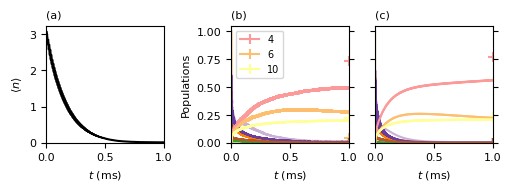

In [39]:
def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(constrained_layout=True,figsize=(5,1.8))

gs = GridSpec(1, 3, figure=fig)
#gs.update(wspace=0.005, hspace=0.05)
ax1 = fig.add_subplot(gs[0, 0])
# identical to ax1 = plt.subplot(gs.new_subplotspec((0, 0), colspan=3))


ax1.set_title(r'(a)',loc='left',fontdict={'fontsize': 8})
ax1.errorbar(t[0]*1e-3,nMC,yerr = nMC_dev,color='black',ecolor='black')
ax1.set_ylim(0)
ax1.set_xlim(0,1)
ax1.set_ylabel('$\\langle n \\rangle$')
ax1.set_xlabel('$t$ (ms)')



ax3 = fig.add_subplot(gs[0, 1])
ax3.set_title(r'(b)',loc='left',fontdict={'fontsize': 8})
for i in range(12):
    ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],color=colors[i])
    ax3.scatter(t[0][-1]*1e-3,pops_full[i],color=colors[i],marker='+',s=60)
i=4
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=6
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
i=10
ax3.errorbar(t[0]*1e-3,pops[i],yerr = pops_divs[i],label=str(i),color=colors[i])
ax3.set_ylabel('Populations')
ax3.set_xlabel('$t$ (ms)')
ax3.set_ylim(0)
ax3.set_xlim(0,1)
ax3.tick_params(axis='y', which='both', left=True, right=True, 
               labelleft=True, labelright=False)
ax3.legend(loc='upper left',prop={'size': 7})

ax4 = fig.add_subplot(gs[0, 2])
ax4.set_title(r'(c)',loc='left',fontdict={'fontsize': 8})
for i in range(12):
    ax4.plot(tlist*1e-3,rho.expect[i],color=colors[i])
    ax4.scatter(t[0][-1]*1e-3,pops_rest[i],color=colors[i],marker='+',s=60)
    #ax4.scatter(t[0][-1]*1e-3,pops_fic[i],color='white',edgecolor=colors[i],marker='d')
i=4
ax4.plot(tlist*1e-3,rho.expect[i],label=i,color=colors[i])
i=6
ax4.plot(tlist*1e-3,rho.expect[i],label=i,color=colors[i])
i=10
ax4.plot(tlist*1e-3,rho.expect[i],label=i,color=colors[i])
ax4.set_xlabel('$t$ (ms)')
ax4.set_ylim(0)
ax4.set_xlim(0,1)
#ax4.legend(loc='upper left',prop={'size': 7})
ax4.tick_params(axis='y', which='both', left=True, right=True, 
               labelleft=False, labelright=False)
#ax4.tick_params(left=False, labelleft=False)

plt.savefig("I1_populations_.pdf",bbox_inches = "tight")


plt.show()